In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import numpy as np
from nilearn import plotting

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load good stuff
%matplotlib inline
%load_ext oct2py.ipython

In [3]:
# Add niak hcp and psomm to oactve path
%octave addpath(genpath('~/git/Misc'));
%octave build_path hcp niak psom

Adding library hcp to the search path.

Adding library niak to the search path.

Adding library psom to the search path.

In [6]:
# Set path
path_root = '/home/yassinebha/Drive/QC_zooniverse/'
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/'
path_outline = os.path.join(path_root ,'template_layout/brain_outline_bold/')
path_layout = os.path.join(path_root ,'template_layout/layout/')
%octave_push  path_root path_outline path_layout

In [7]:
%%octave
# invert mask func
in.source = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl.nii.gz'];
out = [path_root 'template_layout/test_data/HC0040013/HC0040013_test_inv_func.nii.gz'];
opt.only_mask = false;
[in,out,opt] = zoo_brick_invert_contrast(in,out,opt);

In [8]:
%%octave
# invert mask anat
in.source = [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl.nii.gz'];
out = [path_root 'template_layout/test_data/HC0040013/HC0040013_test_inv_anat.nii.gz'];
opt.only_mask = true;
[in,out,opt] = zoo_brick_invert_contrast(in,out,opt);

In [9]:
%octave [path_layout 'layout_anat.nii.gz']

ans = /home/yassinebha/Drive/QC_zooniverse/template_layout/layout/layout_anat.nii.gz

'/home/yassinebha/Drive/QC_zooniverse/template_layout/layout/layout_anat.nii.gz'

In [21]:
%%octave -o out_anat
# anat outline
clear in opt
in.layout=[path_layout 'layout_anat.nii.gz'];
out_anat = '/home/yassinebha/Drive/QC_zooniverse/template_layout/test_anat_layout.nii.gz';
[in,out,opt]= zoo_brick_outline(in,out_anat);

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.4/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


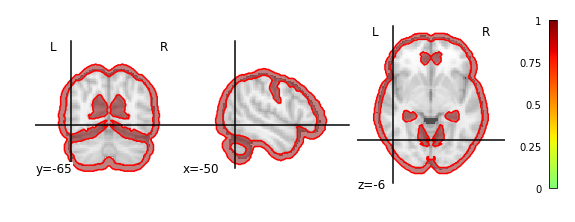

In [22]:
diplay = plotting.plot_stat_map(out_anat,cut_coords=  [-50 , -65 , -6],cmap = 'jet',alpha = 0.5)
diplay.add_contours(out_anat, levels=[0.5], colors='r')

In [37]:
%%octave -o out_func
#func outline
clear in opt
in.layout=[path_layout 'layout_func.nii.gz'];
in.mask_func = [path_outline 'func_mask_average_stereonl.mnc.gz'];
opt.modality = 'func';
out_func = '/home/yassinebha/Drive/QC_zooniverse/template_layout/test_func_layout.nii.gz';
[in,out,opt]= zoo_brick_outline(in,out_func,opt);

Transforming slices:.............................................................................................................................................................................................Done

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.4/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


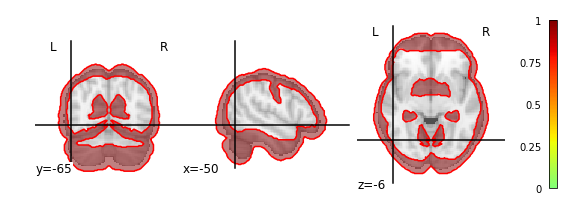

In [38]:
diplay = plotting.plot_stat_map(out_func,cut_coords=  [-50 , -65 , -6],cmap = 'jet',alpha = 0.5)
diplay.add_contours(out_func, levels=[0.5], colors='r')

In [34]:
%%octave -o hdr
[hdr,vol_anat] = niak_read_vol(out_anat);
[hdr,vol_func] = niak_read_vol(out_func);
vol_final = vol_anat | vol_func;
hdr.file_name = '/home/yassinebha/Drive/QC_zooniverse/template_layout/test_func_anat_layout.nii.gz';
niak_write_vol(hdr,vol_final);

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.4/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


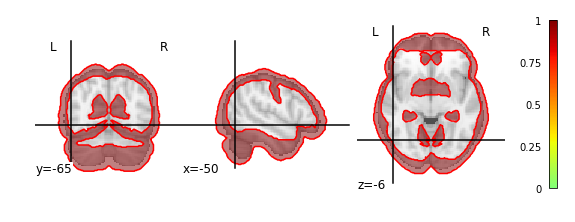

In [36]:
diplay = plotting.plot_stat_map(hdr.file_name,cut_coords=  [-50 , -65 , -6],cmap = 'jet',alpha = 0.5)
diplay.add_contours(hdr.file_name, levels=[0.5], colors='r')

In [43]:
%%octave
#local pipeline report test
clear
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

# Set path
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';
path_outline = [path_root 'template_layout/brain_outline_bold/'];
path_layout = [path_root 'template_layout/layout/'];

%X_0015002 
in.ind.anat.X_0015002 = [path_root 'template_layout/test_data/X_0015002/anat_X_0015002_nuc_stereonl.nii.gz'];
in.ind.func.X_0015002  = [path_root 'template_layout/test_data/X_0015002/func_X_0015002_mean_stereonl.nii.gz'];

in.group.mask_func_group = [path_root 'template_layout/test_data/X_0015002/func_mask_group_stereonl.nii.gz'];
in.group.avg_mask_func = [path_root 'template_layout/test_data/X_0015002/func_mask_average_stereonl.nii.gz'];
in.template.anat_outline = [path_layout 'layout_anat.nii.gz'];
in.template.func_outline = [path_layout 'layout_func.nii.gz']'';

%opt.invert_contrast.perc_min = 0.0001;
%opt.invert_contrast.perc_max = 0.9999;

opt.invert_contrast.perc_min = 0.1;
opt.invert_contrast.perc_max = 0.9999;

opt.folder_out = [path_root 'template_layout/test_data/zooqc_adhd200_test5'];
pipeline = zoo_report_fmri_preprocess(in,opt);


Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.

Logs will be stored in /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/zooqc_adhd200_test5/logs/

Generating dependencies ...

   Percentage completed :  0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100- 0.04 sec

Setting up the to-do list ...

   I found 22 job(s) to do, and 8 job(s) already completed.

Deamon started on 30-Jun-2017 16:51:02

30-Jun-2017 16:51:02 Starting the pipeline manager...

30-Jun-2017 16:51:02 Starting the garbage collector...

30-Jun-2017 16:51:02 Starting worker number 1...

30-Jun-2017 16:51:02 Starting worker number 2...

30-Jun-2017 16:51:03 Starting worker number 3...

30-Jun-2017 16:51:03 Starting worker number 4...

30-Jun-2017 16:51:03 Starting worker number 5...

30-Jun-2017 16:51:03 Starting worker number 6...

30-Jun-2017 16:51:03 Starting worker number 7...

Pipeline started on 30-Jun-2017 16:51:03

user: yassinebha, host: yassinebha-Lemur-Ultra, system: unix

************************************************************

30-Jun-2017 16:51:03 Starting worker number 8...

30-Jun-2017 16:51:03 Starting worker number 9...

30-Jun-2017 16:51:04 Starting worker number 10...

30-Jun-2017 16:51:05 convert2minc                        submitted  (1 run | 0 fail | 8 done | 21 left)

30-Jun-2017 16:51:05 t1_raw_montage_X_0015002            submitted  (2 run | 0 fail | 8 done | 20 left)

30-Jun-2017 16:51:05 bold_nuc_X_0015002                  submitted  (3 run | 0 fail | 8 done | 19 left)

30-Jun-2017 16:51:05 t1_func_raw_montage_X_0015002       submitted  (4 run | 0 fail | 8 done | 18 left)

30-Jun-2017 16:51:05 init_report                         submitted  (5 run | 0 fail | 8 done | 17 left)

30-Jun-2017 16:51:05 anat_manifest                       submitted  (6 run | 0 fail | 8 done | 16 left)

30-Jun-2017 16:51:05 init_report                         finished   (5 run | 0 fail | 9 done | 16 left)

30-Jun-2017 16:51:05 anat_manifest                       finished   (4 run | 0 fail | 10 done | 16 left)

30-Jun-2017 16:51:05 func_manifest                       submitted  (5 run | 0 fail | 10 done | 15 left)

30-Jun-2017 16:51:06 convert2minc                        finished   (4 run | 0 fail | 11 done | 15 left)

30-Jun-2017 16:51:06 func_manifest                       finished   (3 run | 0 fail | 12 done | 15 left)

30-Jun-2017 16:51:06 outline_func_template               submitted  (4 run | 0 fail | 12 done | 14 left)

30-Jun-2017 16:51:10 t1_raw_montage_X_0015002            finished   (3 run | 0 fail | 13 done | 14 left)

30-Jun-2017 16:51:10 t1_func_raw_montage_X_0015002       finished   (2 run | 0 fail | 14 done | 14 left)

30-Jun-2017 16:51:10 t1_X_0015002_overlay                submitted  (3 run | 0 fail | 14 done | 13 left)

30-Jun-2017 16:51:10 t1_back_X_0015002_overlay           submitted  (4 run | 0 fail | 14 done | 12 left)

30-Jun-2017 16:51:10 t1_X_0015002_overlay                finished   (3 run | 0 fail | 15 done | 12 left)

30-Jun-2017 16:51:10 clean_t1_raw_montage_X_0015002      submitted  (4 run | 0 fail | 15 done | 11 left)

30-Jun-2017 16:51:11 clean_t1_raw_montage_X_0015002      finished   (3 run | 0 fail | 16 done | 11 left)

30-Jun-2017 16:51:11 bold_nuc_X_0015002                  finished   (2 run | 0 fail | 17 done | 11 left)

30-Jun-2017 16:51:11 t1_back_X_0015002_overlay           finished   (1 run | 0 fail | 18 done | 11 left)

30-Jun-2017 16:51:11 bold_inv_X_0015002                  submitted  (2 run | 0 fail | 18 done | 10 left)

30-Jun-2017 16:51:11 clean_t1_func_raw_montage_X_0015002 submitted  (3 run | 0 fail | 18 done | 9 left)

30-Jun-2017 16:51:11 Stopping idle worker 4 (not enough jobs left to do).

30-Jun-2017 16:51:11 bold_inv_X_0015002                  finished   (2 run | 0 fail | 19 done | 9 left)

30-Jun-2017 16:51:11 clean_t1_func_raw_montage_X_0015002 finished   (1 run | 0 fail | 20 done | 9 left)

30-Jun-2017 16:51:11 clean_bold_nuc_X_0015002            submitted  (2 run | 0 fail | 20 done | 8 left)

30-Jun-2017 16:51:11 bold_raw_montage_X_0015002          submitted  (3 run | 0 fail | 20 done | 7 left)

30-Jun-2017 16:51:11 Stopping idle worker 5 (not enough jobs left to do).

30-Jun-2017 16:51:11 Stopping idle worker 6 (not enough jobs left to do).

30-Jun-2017 16:51:12 clean_bold_nuc_X_0015002            finished   (2 run | 0 fail | 21 done | 7 left)

30-Jun-2017 16:51:12 bold_raw_montage_X_0015002          finished   (1 run | 0 fail | 22 done | 7 left)

30-Jun-2017 16:51:12 clean_bold_inv_X_0015002            submitted  (2 run | 0 fail | 22 done | 6 left)

30-Jun-2017 16:51:12 Stopping idle worker 2 (not enough jobs left to do).

30-Jun-2017 16:51:13 clean_bold_inv_X_0015002            finished   (1 run | 0 fail | 23 done | 6 left)

30-Jun-2017 16:51:26 outline_func_template               finished   (0 run | 0 fail | 24 done | 6 left)

30-Jun-2017 16:51:26 clean_convert2minc                  submitted  (1 run | 0 fail | 24 done | 5 left)

30-Jun-2017 16:51:26 montage_func_outline                submitted  (2 run | 0 fail | 24 done | 4 left)

30-Jun-2017 16:51:26 Stopping idle worker 7 (not enough jobs left to do).

30-Jun-2017 16:51:26 Stopping idle worker 8 (not enough jobs left to do).

30-Jun-2017 16:51:27 clean_convert2minc                  finished   (1 run | 0 fail | 25 done | 4 left)

30-Jun-2017 16:51:29 montage_func_outline                finished   (0 run | 0 fail | 26 done | 4 left)

30-Jun-2017 16:51:29 bold_X_0015002_overlay              submitted  (1 run | 0 fail | 26 done | 3 left)

30-Jun-2017 16:51:29 t1_back_X_0015002_outline           submitted  (2 run | 0 fail | 26 done | 2 left)

30-Jun-2017 16:51:29 Stopping idle worker 9 (not enough jobs left to do).

30-Jun-2017 16:51:29 Stopping idle worker 10 (not enough jobs left to do).

30-Jun-2017 16:51:29 bold_X_0015002_overlay              finished   (1 run | 0 fail | 27 done | 2 left)

30-Jun-2017 16:51:29 t1_back_X_0015002_outline           finished   (0 run | 0 fail | 28 done | 2 left)

30-Jun-2017 16:51:29 clean_bold_raw_montage_X_0015002    submitted  (1 run | 0 fail | 28 done | 1 left)

30-Jun-2017 16:51:29 clean_t1_back_X_0015002_overlay     submitted  (2 run | 0 fail | 28 done | 0 left)

Deamon terminated on 30-Jun-2017 16:51:30

pure virtual method called

terminate called without an active exception

panic: Aborted -- stopping myself...

attempting to save variables to 'octave-workspace'...

panic: attempted clean up apparently failed -- aborting...

30-Jun-2017 16:51:30 clean_bold_raw_montage_X_0015002    finished   (1 run | 0 fail | 29 done | 0 left)

30-Jun-2017 16:51:30 clean_t1_back_X_0015002_overlay     finished   (0 run | 0 fail | 30 done | 0 left)

30-Jun-2017 16:51:30 Stopping idle worker 1 (not enough jobs left to do).

30-Jun-2017 16:51:30 Stopping idle worker 3 (not enough jobs left to do).

*******************************************

Pipeline terminated on 30-Jun-2017 16:51:30

All jobs have been successfully completed.

In [42]:
%%octave
#local pipeline report test
clear
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

# Set path
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';
path_outline = [path_root 'template_layout/brain_outline_bold/'];
path_layout = [path_root 'template_layout/layout/'];

%HC0040013 
in.ind.anat.HC0040013 = [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl.nii.gz'];
in.ind.func.HC0040013  = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl.nii.gz'];
%HC0040020 
in.ind.anat.HC0040020 = [path_root 'template_layout/test_data/HC0040020/anat_HC0040020_nuc_stereonl.nii.gz'];
in.ind.func.HC0040020  = [path_root 'template_layout/test_data/HC0040020/func_HC0040020_mean_stereonl.nii.gz'];

in.group.mask_func_group = [path_root 'template_layout/test_data/HC0040013/func_mask_group_stereonl.nii.gz'];
in.group.avg_mask_func = [path_root 'template_layout/test_data/group_coregistration/func_mask_average_stereonl.nii.gz'];
in.template.anat_outline = [path_layout 'layout_anat.nii.gz'];
in.template.func_outline = [path_layout 'layout_func.nii.gz']'';

opt.invert_contrast.perc_min = 0.0001;
opt.invert_contrast.perc_max = 0.9999;
opt.folder_out = [path_root 'template_layout/test_data/zooqc_adhd200_test5'];
pipeline = zoo_report_fmri_preprocess(in,opt);


Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.

Logs will be stored in /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/zooqc_adhd200_test5/logs/

Generating dependencies ...

   Percentage completed :  0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100- 0.04 sec

Setting up the to-do list ...

   I found 37 job(s) to do, and 8 job(s) already completed.

Deamon started on 30-Jun-2017 16:45:45

30-Jun-2017 16:45:45 Starting the pipeline manager...

30-Jun-2017 16:45:45 Starting the garbage collector...

30-Jun-2017 16:45:45 Starting worker number 1...

30-Jun-2017 16:45:45 Starting worker number 2...

30-Jun-2017 16:45:45 Starting worker number 3...

30-Jun-2017 16:45:45 Starting worker number 4...

30-Jun-2017 16:45:46 Starting worker number 5...

30-Jun-2017 16:45:46 Starting worker number 6...

30-Jun-2017 16:45:46 Starting worker number 7...

Pipeline started on 30-Jun-2017 16:45:46

user: yassinebha, host: yassinebha-Lemur-Ultra, system: unix

************************************************************

30-Jun-2017 16:45:46 Starting worker number 8...

30-Jun-2017 16:45:46 Starting worker number 9...

30-Jun-2017 16:45:46 Starting worker number 10...

30-Jun-2017 16:45:47 convert2minc                        submitted  (1 run | 0 fail | 8 done | 36 left)

30-Jun-2017 16:45:47 t1_raw_montage_HC0040013            submitted  (2 run | 0 fail | 8 done | 35 left)

30-Jun-2017 16:45:47 t1_raw_montage_HC0040020            submitted  (3 run | 0 fail | 8 done | 34 left)

30-Jun-2017 16:45:47 bold_nuc_HC0040013                  submitted  (4 run | 0 fail | 8 done | 33 left)

30-Jun-2017 16:45:47 bold_nuc_HC0040020                  submitted  (5 run | 0 fail | 8 done | 32 left)

30-Jun-2017 16:45:47 t1_func_raw_montage_HC0040013       submitted  (6 run | 0 fail | 8 done | 31 left)

30-Jun-2017 16:45:47 t1_func_raw_montage_HC0040020       submitted  (7 run | 0 fail | 8 done | 30 left)

30-Jun-2017 16:45:47 init_report                         submitted  (8 run | 0 fail | 8 done | 29 left)

30-Jun-2017 16:45:48 init_report                         finished   (7 run | 0 fail | 9 done | 29 left)

30-Jun-2017 16:45:48 anat_manifest                       submitted  (8 run | 0 fail | 9 done | 28 left)

30-Jun-2017 16:45:48 func_manifest                       submitted  (9 run | 0 fail | 9 done | 27 left)

30-Jun-2017 16:45:48 anat_manifest                       finished   (8 run | 0 fail | 10 done | 27 left)

30-Jun-2017 16:45:48 func_manifest                       finished   (7 run | 0 fail | 11 done | 27 left)

30-Jun-2017 16:45:53 t1_func_raw_montage_HC0040013       finished   (6 run | 0 fail | 12 done | 27 left)

30-Jun-2017 16:45:53 t1_back_HC0040013_overlay           submitted  (7 run | 0 fail | 12 done | 26 left)

30-Jun-2017 16:45:54 t1_func_raw_montage_HC0040020       finished   (6 run | 0 fail | 13 done | 26 left)

30-Jun-2017 16:45:54 t1_back_HC0040013_overlay           finished   (5 run | 0 fail | 14 done | 26 left)

30-Jun-2017 16:45:54 clean_t1_func_raw_montage_HC0040013 submitted  (6 run | 0 fail | 14 done | 25 left)

30-Jun-2017 16:45:54 t1_back_HC0040020_overlay           submitted  (7 run | 0 fail | 14 done | 24 left)

30-Jun-2017 16:45:54 clean_t1_func_raw_montage_HC0040013 finished   (6 run | 0 fail | 15 done | 24 left)

30-Jun-2017 16:45:54 t1_back_HC0040020_overlay           finished   (5 run | 0 fail | 16 done | 24 left)

30-Jun-2017 16:45:54 clean_t1_func_raw_montage_HC0040020 submitted  (6 run | 0 fail | 16 done | 23 left)

30-Jun-2017 16:45:55 bold_nuc_HC0040020                  finished   (5 run | 0 fail | 17 done | 23 left)

30-Jun-2017 16:45:55 clean_t1_func_raw_montage_HC0040020 finished   (4 run | 0 fail | 18 done | 23 left)

30-Jun-2017 16:45:55 bold_inv_HC0040020                  submitted  (5 run | 0 fail | 18 done | 22 left)

30-Jun-2017 16:45:55 bold_inv_HC0040020                  finished   (4 run | 0 fail | 19 done | 22 left)

30-Jun-2017 16:45:55 clean_bold_nuc_HC0040020            submitted  (5 run | 0 fail | 19 done | 21 left)

30-Jun-2017 16:45:55 bold_raw_montage_HC0040020          submitted  (6 run | 0 fail | 19 done | 20 left)

30-Jun-2017 16:45:56 clean_bold_nuc_HC0040020            finished   (5 run | 0 fail | 20 done | 20 left)

30-Jun-2017 16:45:57 bold_raw_montage_HC0040020          finished   (4 run | 0 fail | 21 done | 20 left)

30-Jun-2017 16:45:57 clean_bold_inv_HC0040020            submitted  (5 run | 0 fail | 21 done | 19 left)

30-Jun-2017 16:45:57 bold_nuc_HC0040013                  finished   (4 run | 0 fail | 22 done | 19 left)

30-Jun-2017 16:45:57 clean_bold_inv_HC0040020            finished   (3 run | 0 fail | 23 done | 19 left)

30-Jun-2017 16:45:57 bold_inv_HC0040013                  submitted  (4 run | 0 fail | 23 done | 18 left)

30-Jun-2017 16:45:58 convert2minc                        finished   (3 run | 0 fail | 24 done | 18 left)

30-Jun-2017 16:45:58 t1_raw_montage_HC0040020            finished   (2 run | 0 fail | 25 done | 18 left)

30-Jun-2017 16:45:58 bold_inv_HC0040013                  finished   (1 run | 0 fail | 26 done | 18 left)

30-Jun-2017 16:45:58 outline_func_template               submitted  (2 run | 0 fail | 26 done | 17 left)

30-Jun-2017 16:45:58 t1_HC0040020_overlay                submitted  (3 run | 0 fail | 26 done | 16 left)

30-Jun-2017 16:45:58 clean_bold_nuc_HC0040013            submitted  (4 run | 0 fail | 26 done | 15 left)

30-Jun-2017 16:45:58 bold_raw_montage_HC0040013          submitted  (5 run | 0 fail | 26 done | 14 left)

30-Jun-2017 16:45:58 clean_bold_nuc_HC0040013            finished   (4 run | 0 fail | 27 done | 14 left)

30-Jun-2017 16:45:59 t1_HC0040020_overlay                finished   (3 run | 0 fail | 28 done | 14 left)

30-Jun-2017 16:45:59 clean_t1_raw_montage_HC0040020      submitted  (4 run | 0 fail | 28 done | 13 left)

30-Jun-2017 16:45:59 bold_raw_montage_HC0040013          finished   (3 run | 0 fail | 29 done | 13 left)

30-Jun-2017 16:45:59 clean_bold_inv_HC0040013            submitted  (4 run | 0 fail | 29 done | 12 left)

30-Jun-2017 16:45:59 t1_raw_montage_HC0040013            finished   (3 run | 0 fail | 30 done | 12 left)

30-Jun-2017 16:45:59 clean_t1_raw_montage_HC0040020      finished   (2 run | 0 fail | 31 done | 12 left)

30-Jun-2017 16:45:59 clean_bold_inv_HC0040013            finished   (1 run | 0 fail | 32 done | 12 left)

30-Jun-2017 16:45:59 t1_HC0040013_overlay                submitted  (2 run | 0 fail | 32 done | 11 left)

30-Jun-2017 16:46:00 t1_HC0040013_overlay                finished   (1 run | 0 fail | 33 done | 11 left)

30-Jun-2017 16:46:00 clean_t1_raw_montage_HC0040013      submitted  (2 run | 0 fail | 33 done | 10 left)

30-Jun-2017 16:46:00 clean_t1_raw_montage_HC0040013      finished   (1 run | 0 fail | 34 done | 10 left)

30-Jun-2017 16:46:16 outline_func_template               finished   (0 run | 0 fail | 35 done | 10 left)

30-Jun-2017 16:46:16 clean_convert2minc                  submitted  (1 run | 0 fail | 35 done | 9 left)

30-Jun-2017 16:46:16 montage_func_outline                submitted  (2 run | 0 fail | 35 done | 8 left)

30-Jun-2017 16:46:16 Stopping idle worker 3 (not enough jobs left to do).

30-Jun-2017 16:46:16 Stopping idle worker 4 (not enough jobs left to do).

30-Jun-2017 16:46:17 clean_convert2minc                  finished   (1 run | 0 fail | 36 done | 8 left)

.

30-Jun-2017 16:46:19 montage_func_outline                finished   (0 run | 0 fail | 37 done | 8 left)

30-Jun-2017 16:46:19 bold_HC0040013_overlay              submitted  (1 run | 0 fail | 37 done | 7 left)

30-Jun-2017 16:46:19 bold_HC0040020_overlay              submitted  (2 run | 0 fail | 37 done | 6 left)

30-Jun-2017 16:46:19 t1_back_HC0040013_outline           submitted  (3 run | 0 fail | 37 done | 5 left)

30-Jun-2017 16:46:19 t1_back_HC0040020_outline           submitted  (4 run | 0 fail | 37 done | 4 left)

30-Jun-2017 16:46:19 Stopping idle worker 7 (not enough jobs left to do).

30-Jun-2017 16:46:19 Stopping idle worker 8 (not enough jobs left to do).

30-Jun-2017 16:46:19 Stopping idle worker 9 (not enough jobs left to do).

30-Jun-2017 16:46:19 Stopping idle worker 10 (not enough jobs left to do).

30-Jun-2017 16:46:19 bold_HC0040013_overlay              finished   (3 run | 0 fail | 38 done | 4 left)

30-Jun-2017 16:46:19 bold_HC0040020_overlay              finished   (2 run | 0 fail | 39 done | 4 left)

30-Jun-2017 16:46:19 t1_back_HC0040013_outline           finished   (1 run | 0 fail | 40 done | 4 left)

30-Jun-2017 16:46:19 clean_bold_raw_montage_HC0040013    submitted  (2 run | 0 fail | 40 done | 3 left)

30-Jun-2017 16:46:19 clean_bold_raw_montage_HC0040020    submitted  (3 run | 0 fail | 40 done | 2 left)

30-Jun-2017 16:46:19 clean_t1_back_HC0040013_overlay     submitted  (4 run | 0 fail | 40 done | 1 left)

30-Jun-2017 16:46:20 clean_bold_raw_montage_HC0040013    finished   (3 run | 0 fail | 41 done | 1 left)

30-Jun-2017 16:46:20 clean_bold_raw_montage_HC0040020    finished   (2 run | 0 fail | 42 done | 1 left)

30-Jun-2017 16:46:20 clean_t1_back_HC0040013_overlay     finished   (1 run | 0 fail | 43 done | 1 left)

30-Jun-2017 16:46:20 t1_back_HC0040020_outline           finished   (0 run | 0 fail | 44 done | 1 left)

30-Jun-2017 16:46:20 clean_t1_back_HC0040020_overlay     submitted  (1 run | 0 fail | 44 done | 0 left)

30-Jun-2017 16:46:20 Stopping idle worker 2 (not enough jobs left to do).

30-Jun-2017 16:46:20 Stopping idle worker 5 (not enough jobs left to do).

30-Jun-2017 16:46:20 Stopping idle worker 6 (not enough jobs left to do).

30-Jun-2017 16:46:20 clean_t1_back_HC0040020_overlay     finished   (0 run | 0 fail | 45 done | 0 left)

30-Jun-2017 16:46:20 Stopping idle worker 1 (not enough jobs left to do).

*******************************************

Pipeline terminated on 30-Jun-2017 16:46:20

All jobs have been successfully completed.

In [ ]:
#run on guillimin cobree
clear all
addpath(genpath('/home/yassinebha/git/Misc'))
build_path zooniverse_qc

path_fmri_preproc ='/home/yassinebha/database/cobre_fmri_preprocess_nii_20160920/';
in = zoo_grab_report_preprocess(path_fmri_preproc);
in.template.anat_outline = '/home/yassinebha/layout_anat.nii.gz';
in.template.func_outline = '/home/yassinebha/layout_func.nii.gz';

opt.invert_contrast.perc_min = 0.0001;
opt.invert_contrast.perc_max = 0.9999;
opt.folder_out =['/gs/project/gsf-624-aa/projects/zooniverse_qc/zooqc_report_cobre_' date];
pipeline = zoo_report_fmri_preprocess(in,opt);

In [ ]:
#run on guillimin adhd
clear all
addpath(genpath('/home/yassinebha/git/Misc'))
build_path zooniverse_qc
path_fmri_preproc ='/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess_old/';
files_in  = niak_grab_qc_fmri_preprocess(path_fmri_preproc);
in.ind.anat = files_in.anat;
in.ind.func = files_in.func;
in.group.mask_func_group = ['/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess/mask/func_mask_group_stereonl.nii.gz'];
in.group.avg_mask_func = ['/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess/mask/func_mask_average_stereonl.nii.gz'];
in.template.anat_outline = '/home/yassinebha/layout_anat.nii.gz';
in.template.func_outline = '/home/yassinebha/layout_func.nii.gz';

opt.invert_contrast.perc_min = 0.1;
opt.invert_contrast.perc_max = 0.9999;
opt.folder_out =['/gs/project/gsf-624-aa/projects/zooniverse_qc/zooqc_report_adhd_' date];

pipeline = zoo_report_fmri_preprocess(in,opt);

In [ ]:
# search best coordinate or anat an func montage 
#coord_old =[-30 , -65 , -6 ;
#             -8 , -25 ,  10 ;
#             30 ,  45 ,  60];          
             
coord_anat =[-50 , -65 , -6 ;
             -8 , -20 ,  13 ;
             30 ,  54 ,  58];
             
coord_func =[-50 , -57 , 5 ;
             -8 , -20 ,  19 ;
             30 ,  45 ,  58];